In [6]:
%pip install nichord
%pip install nichord.plotting

  Using cached nichord-0.3.3-py3-none-any.whl.metadata (1.2 kB)
  Using cached nilearn-0.11.1-py3-none-any.whl.metadata (9.3 kB)
Using cached nichord-0.3.3-py3-none-any.whl (20 kB)
Using cached nilearn-0.11.1-py3-none-any.whl (10.5 MB)
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement nichord.plotting (from versions: none)
ERROR: No matching distribution found for nichord.plotting
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from nichord.chord import plot_chord
import nichord


<Figure size 1000x1000 with 0 Axes>

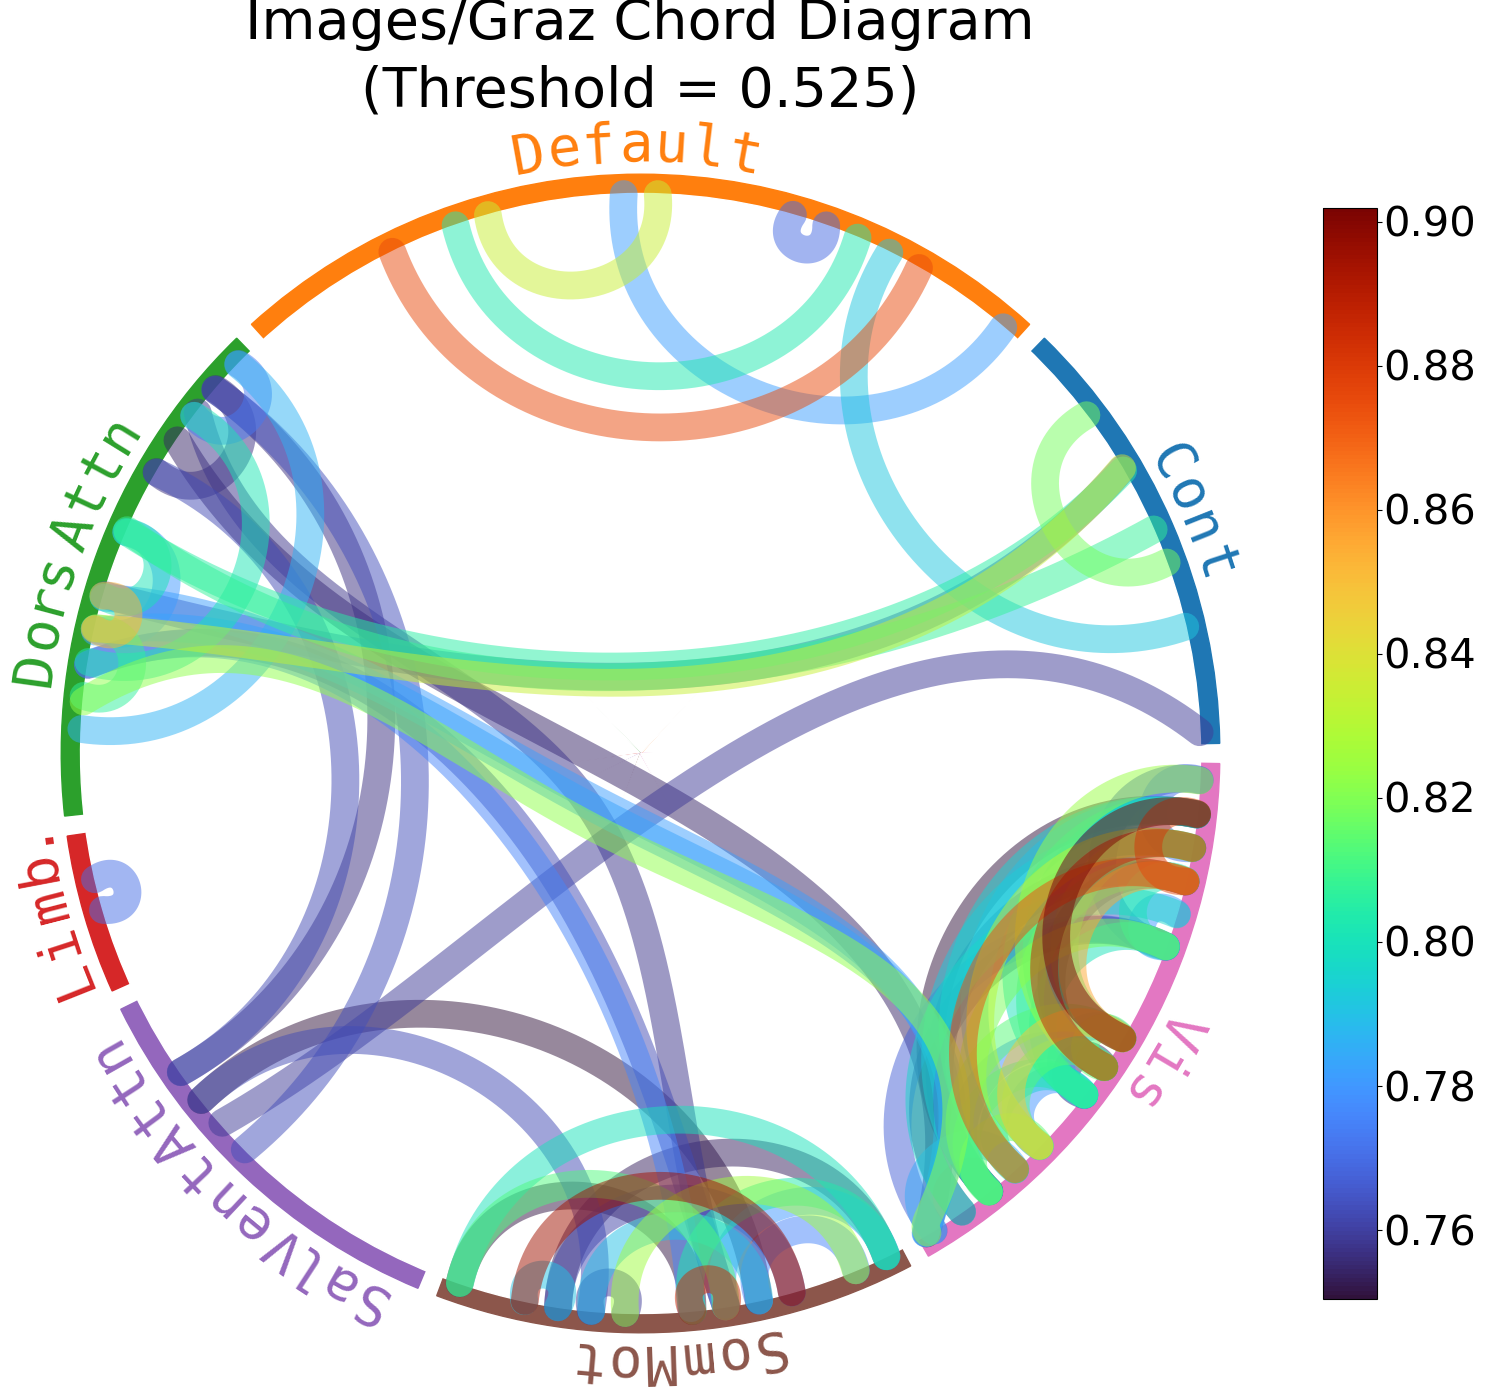

<Figure size 1000x1000 with 0 Axes>

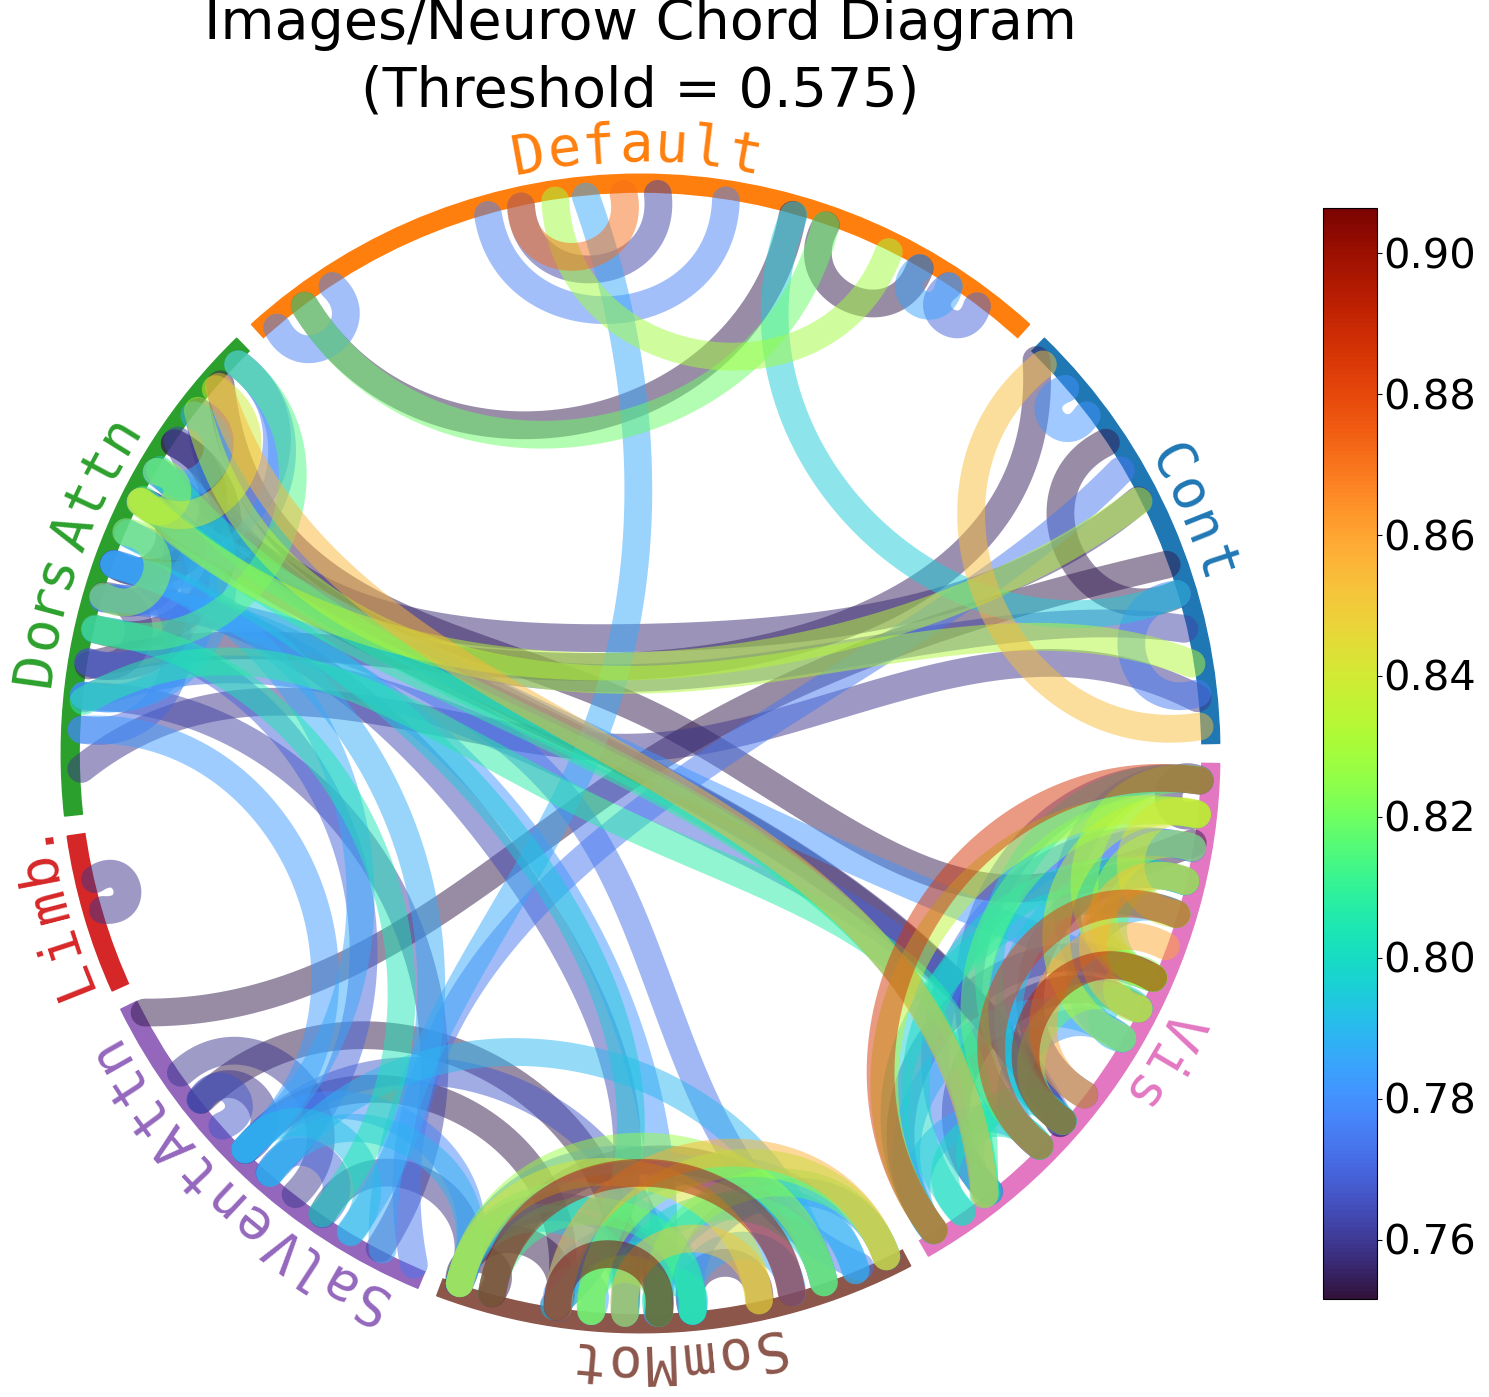

<Figure size 1000x1000 with 0 Axes>

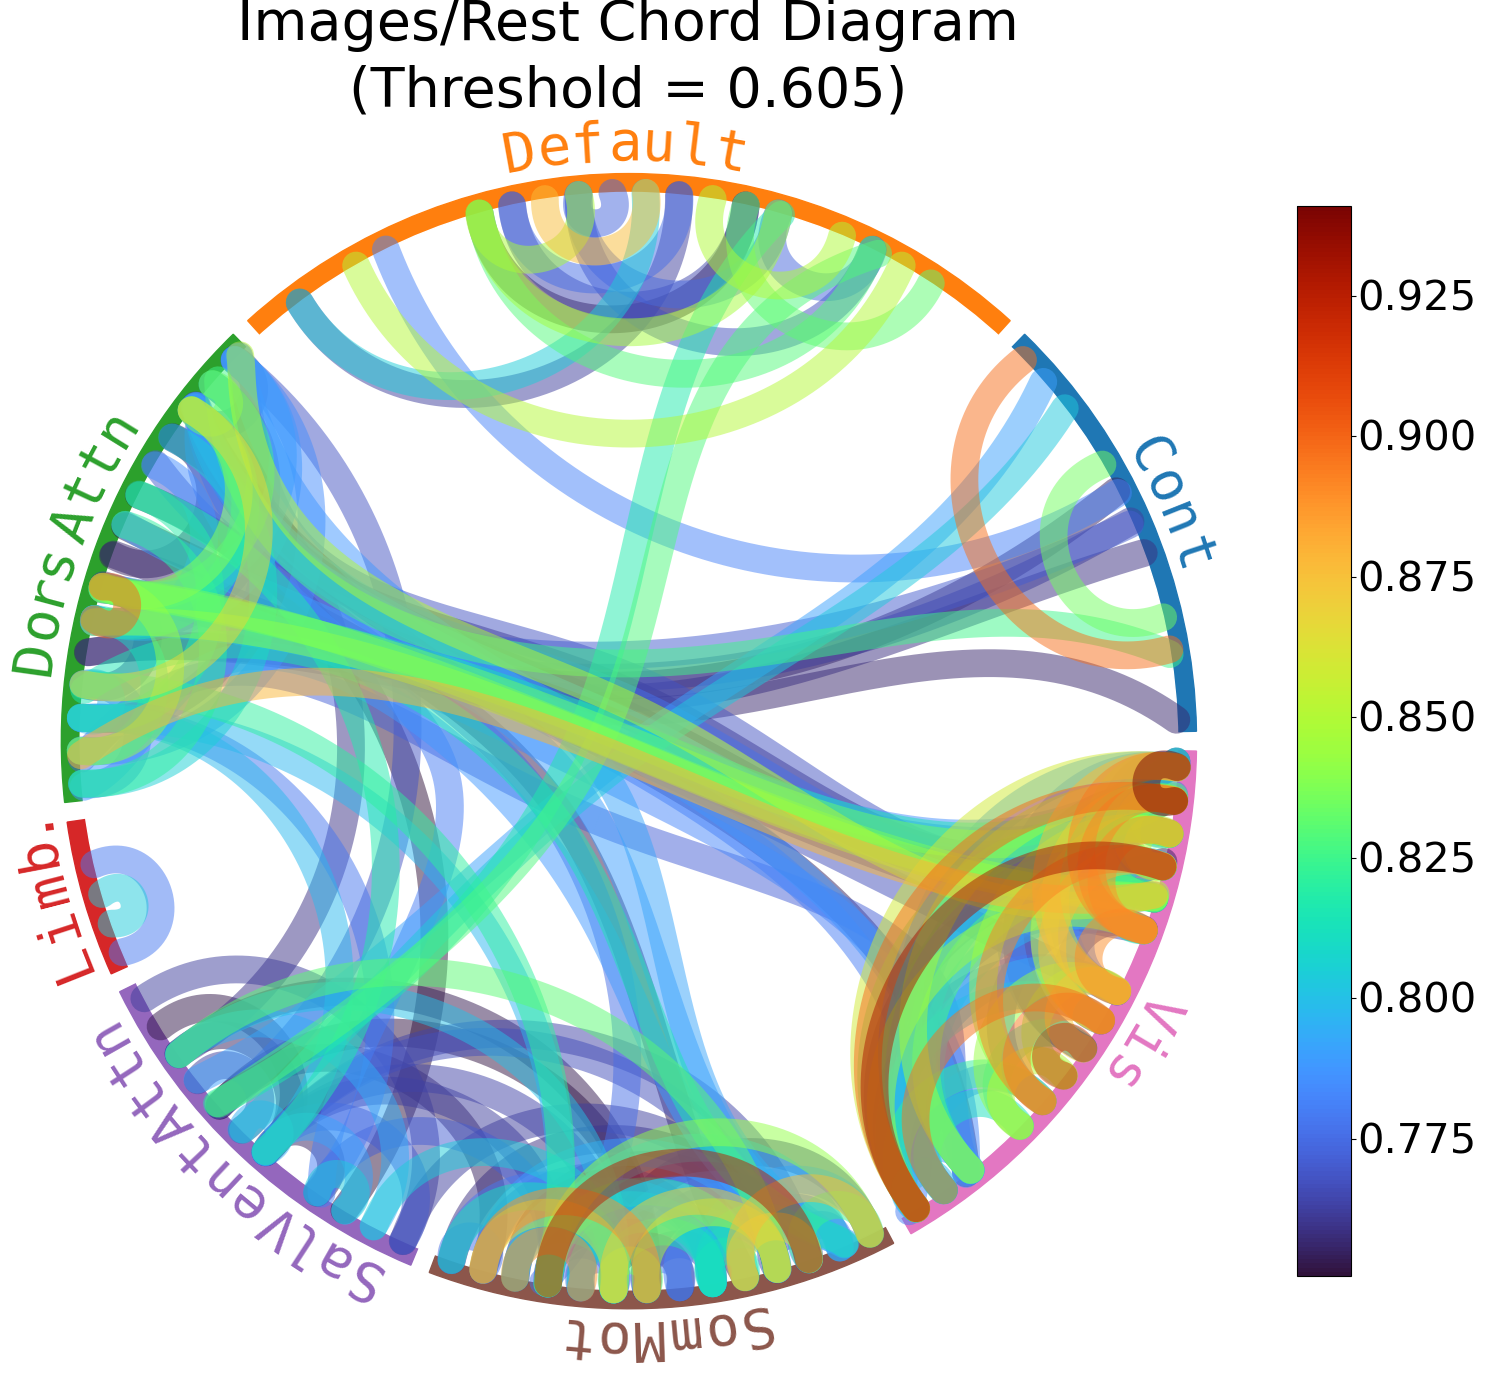

In [38]:
# Define the three conditions
conditions = ['Graz', 'Neurow', 'Rest']

# Replace these with your actual connectivity matrices (assumed square numpy arrays)
# For example:
correlation_matrix = np.load('condition_matrixes.npy')

# Unpack the data (the averaged correlation matrices for each condition)
graz_matrix = correlation_matrix[0]
neurow_matrix = correlation_matrix[1]
rest_matrix = correlation_matrix[2]

matrices = {
    'Graz': graz_matrix,
    'Neurow': neurow_matrix,
    'Rest': rest_matrix
}

# Load the LUT file only once.
csv_file = 'Schaefer_100parcels_7Networks/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'
with open(csv_file, 'r') as file:
    lut_data = file.readlines()

# Define the networks (without hemisphere distinction)
networks = [
    'Vis', 'SomMot', 'DorsAttn', 
    'SalVentAttn', 'Limbic', 'Cont', 'Default'
]

# Create an index-to-label dictionary that combines left and right hemispheres
idx_to_label = {}
current_idx = 0

# Parse the LUT data to create the mapping
for line in lut_data[1:]:  # Skip header
    if line.strip():  # Skip empty lines
        parts = line.strip().split(',')
        for network in networks:
            # Check if line contains either left or right version of this network
            left_prefix = f'7Networks_LH_{network}'
            right_prefix = f'7Networks_RH_{network}'
            if left_prefix in parts[1] or right_prefix in parts[1]:
                idx_to_label[current_idx] = network  # Assign just the network name without hemisphere
                current_idx += 1
                break

n_nodes = 100

# Loop over conditions and create a chord diagram for each
for condition in conditions:
    # Get the connectivity matrix and ensure no self-connections
    connectivity_matrix = matrices[condition].copy()
    np.fill_diagonal(connectivity_matrix, 0)

    # Determine a threshold value; here we use the 75th percentile
    threshold_value = np.percentile(connectivity_matrix[connectivity_matrix > 0], 75)
    
    # Create a weighted matrix: keep only connections above the threshold
    weighted_matrix = connectivity_matrix.copy()
    weighted_matrix[weighted_matrix < threshold_value] = 0

    # Extract edges (only one triangle of the symmetric matrix)
    edges = []
    edge_weights = []
    for i in range(n_nodes):
        for j in range(i+1, n_nodes):
            if weighted_matrix[i, j] != 0:
                edges.append((i, j))
                edge_weights.append(weighted_matrix[i, j])
        
    # Create a new figure for the chord diagram
    plt.figure(figsize=(10, 10))
    
    # Plot the chord diagram with NiChord
    plot_chord(
        idx_to_label=idx_to_label, 
        edges=edges,
        edge_weights=edge_weights, 
        linewidths=20, 
        alphas=0.5,
        do_ROI_circles=False, 
        label_fontsize=40, 
        do_ROI_circles_specific=False, 
        ROI_circle_radius=0,
        edge_threshold=0.75,  # We've already thresholded our data
        black_BG=False
    )
    
    plt.title(f'Images/{condition} Chord Diagram\n(Threshold = {threshold_value:.3f})', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'Images/{condition}_chord_diagram_combined_networks.png', dpi=300)
    plt.show()

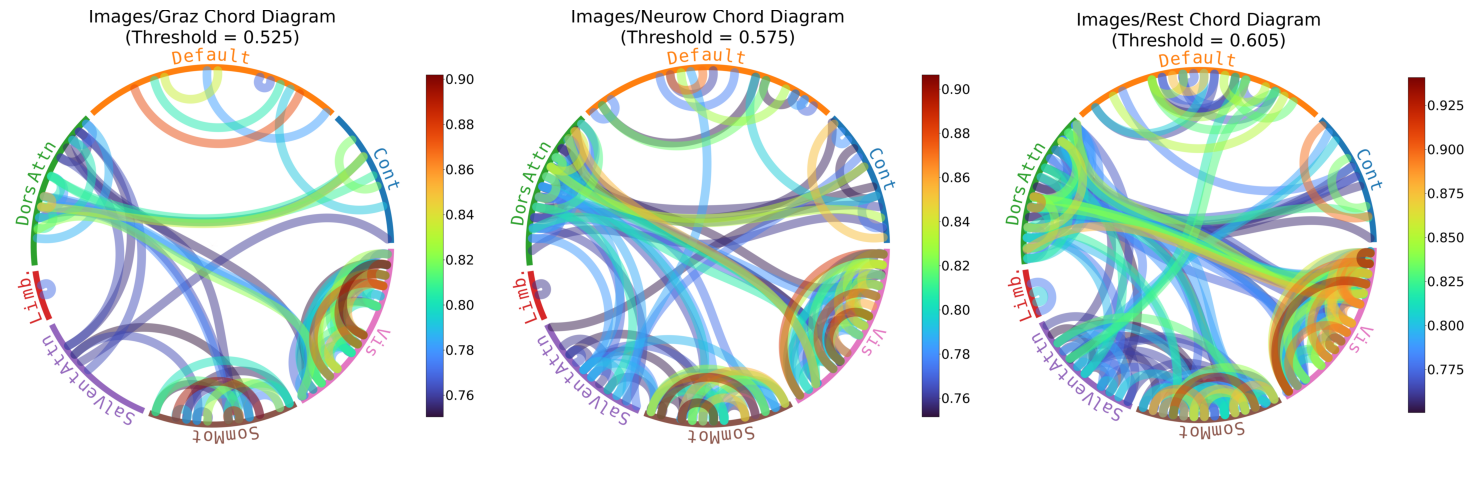

<Figure size 640x480 with 0 Axes>

In [39]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Load the three images
image1 = mpimg.imread('Images/Graz_chord_diagram_combined_networks.png')
image2 = mpimg.imread('Images/Neurow_chord_diagram_combined_networks.png')
image3 = mpimg.imread('Images/Rest_chord_diagram_combined_networks.png')

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display each image in a subplot
axes[0].imshow(image1)
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].axis('off')

axes[2].imshow(image3)
axes[2].axis('off')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()
# Save the figure as an image
plt.savefig('Images/combined_chord_diagrams.png', dpi=300)